In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib as mpl
from scipy.special import comb
import colors
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
orange = ["#ff8c00"]
blue = ["#4173b3"]
green = ["#66cdaa"]
red = ["#e85c47"]
alpha = [0.5,0.4,0.3,0.2,0.1,0.0]
beta = [0.9,0.8,0.6,0.4,0.2,0.1]
for i,c in enumerate(alpha):
        orange.append(colors.get_alpha_hex(orange[0],beta[i]))
        blue.append(colors.get_alpha_hex(blue[0],beta[i]))
        green.append(colors.get_alpha_hex(green[0],beta[i]))
        red.append(colors.get_alpha_hex(red[0],beta[i]))

In [3]:
def Basis(L,N):
    return int(comb(L+N-1,N))#return spe.binom(L+N-1,N)
def BasisNumber(L,N):
    BNumber = []
    for i in range(2,min(N,L)+1):
        if L%i==0 and N%i==0:
            LL=int(L/i)
            NN=int(N/i)
            BNumber.append( BasisNumber(LL,NN))
    return Basis(L,N)-sum(BNumber)
def NumOfCycles(L,N):
    NCycles = 0
    for i in range(2,min(N,L)+1):
        if L%i==0 and N%i==0:
            LL=int(L/i)
            NN=int(N/i)
            NCycles+=int(BasisNumber(LL,NN)/LL)
    NCyclesL=int(BasisNumber(L,N)/L)
    return NCycles, NCycles+NCyclesL

In [4]:
Lmax=33
Lmin=6
γ=0.5772156649 #Euler–Mascheroni constant
NCyclesLTL=np.zeros(Lmax-Lmin+1)
NCyclesTotal=np.zeros(Lmax-Lmin+1)
L=np.zeros(Lmax-Lmin+1)
Lf=np.zeros(Lmax-Lmin+1+5)
basis2Asym=np.zeros(Lmax-Lmin+1)
for i in range(Lmin,Lmax+1):
    NCyclesLTL[i-Lmin],NCyclesTotal[i-Lmin]=NumOfCycles(i,i)
    L[i-Lmin]=i
    basis2Asym[i-Lmin]=2.0**(-(i))*(i)*(np.exp(γ)*np.log(np.log(i))+0)/(1-2**(-(i)+1.5379*np.log(i)/np.log(np.log(i))))

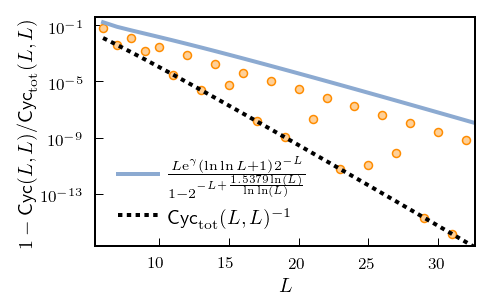

In [5]:
plt.style.reload_library()
with plt.style.context('./aps.mplstyle'):
    fig = plt.figure()
    ax= fig.add_subplot(111)
    ax.set_xlabel(r'$L$')
    ax.set_ylabel(r'$1-{\sf{Cyc}}(L,L)/{\sf{Cyc}}_{{\rm{tot}}}(L,L)$')
    ax.plot(L,(NCyclesLTL/NCyclesTotal),'o',markeredgecolor= "#ff8c00",mew=.75, markerfacecolor=orange[4],markersize = 4)
    ax.plot(L,basis2Asym,linestyle='-',color=blue[3], linewidth = 2,label=r'$\frac{L {\rm{e}}^{\gamma}\left(\ln\ln L+1\right)2^{-L}}{1-2^{-L+\frac{1.5379\ln(L)}{\ln\ln(L)}}}$')
    ax.plot(L,1/NCyclesTotal,':',c = "#000000", linewidth = 2,label=r'${\sf{Cyc}}_{\rm{tot}}(L,L)^{-1}$')
    ax.set_yscale('log')
    ax.set_xlim(5.4,32.6)
    ax.set_ylim(2e-17,4e-1)
    ax.legend(loc=(0.04,0.04))
    ax.tick_params(axis='x', top="off",which='both',labeltop='off')
    ax.tick_params(axis='y', right="off",which='both',labeltop='off')
    plt.savefig('../figures/Cycles.pdf', transparent=False)    
    plt.savefig('../figures/Cycles.svg', transparent=False)   
    plt.show